### Load and analyze TE annotations from EDTA.

### analyze intact TEs

In [1]:
import glob, os
import itertools
import pandas as pd
import matplotlib.pyplot as plt

#make a dict containing all gffs as pandas dfs
os.chdir("<EDTA_results_directory>")
files = {}
for file in glob.glob("*.fasta.mod.EDTA.intact.gff3"):
    raw = pd.read_csv(file, sep = '\t', header = None, index_col=0)
    TE_gff = raw[~raw[2].isin(['long_terminal_repeat', 'repeat_region', 'target_site_duplication'])] #delete all rows containing TIR TSD and repeat info
    files['_'.join(file.split('.fasta')[0].split('_')[:2])] = TE_gff
    

files = dict(sorted(files.items()))


#find all TE types
tes = []
for i in files.keys():
    tes.append(list(files[i][2]))
tes = list(set(list(itertools.chain.from_iterable(tes))))

### analyze fragmented TEs

In [2]:
os.chdir("<EDTA_results_directory>/fragmented/")
files_frag = {}
for file in glob.glob("*.gff3"):
    raw = pd.read_csv(file, sep = '\t', header = None, index_col=0)
    TE_gff = raw[~raw[2].isin(['long_terminal_repeat', 'repeat_region', 'target_site_duplication'])] #delete all rows containing TIR TSD and repeat info
    files_frag['_'.join(file.split('.fasta')[0].split('_')[:2])] = TE_gff
files_frag = dict(sorted(files_frag.items()))


#find all TE types

tes = []
for i in files_frag.keys():
    tes.append(list(files[i][2]))
    
tes = list(set(list(itertools.chain.from_iterable(tes))))

/home/setri100/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


#### calculate number of intact TEs per species

In [3]:
df_intact = pd.DataFrame()
df_intact['TE_type']= tes
for species in files.keys():
    Te_freq = {}
    for te in tes:
        Te_freq[te] = len(files[species][files[species][2] == te][2])
    df_intact[species] = list(Te_freq.values())
df_intact

,TE_type,a_alpina,a_thaliana,b_gravinae,b_oleracea,b_tournefortii,c_annua,c_gynandra,d_erucoides,d_tenuifolia,d_viminea,h_incana1,h_incana3,m_arvensis,m_moricandioides,m_nitens,m_suffruticosa
0,Mutator_TIR_transposon,815,208,810,665,356,574,810,769,858,475,501,435,1380,929,977,1034
1,LTR_retrotransposon,604,27,322,148,118,388,322,761,732,150,254,149,2030,992,450,488
2,Gypsy_LTR_retrotransposon,1763,73,817,264,248,1836,817,1759,1397,535,497,186,1584,852,625,644
3,helitron,581,360,1467,108,379,862,1467,908,948,613,859,797,835,564,455,532
4,Tc1_Mariner_TIR_transposon,152,16,93,87,31,59,93,91,93,59,184,70,114,83,64,80
5,PIF_Harbinger_TIR_transposon,153,38,557,689,173,414,557,543,668,232,296,299,1213,705,1028,936
6,hAT_TIR_transposon,907,59,1265,1115,458,412,1265,812,947,585,1014,913,690,457,483,455
7,CACTA_TIR_transposon,380,104,583,538,245,543,583,421,690,319,435,311,840,442,409,428
8,Copia_LTR_retrotransposon,1057,105,1548,584,361,1122,1548,2823,1684,840,810,437,3733,1660,1343,1633


#### calculate number of intact TEs per species

In [4]:
df_frag = pd.DataFrame()
df_frag['TE_type']= tes
for species in files_frag.keys():
    Te_freq = {}
    for te in tes:
        Te_freq[te] = len(files_frag[species][files_frag[species][2] == te][2])
    df_frag[species] = list(Te_freq.values())
df_frag


,TE_type,a_alpina,a_thaliana,b_gravinae,b_oleracea,b_tournefortii,c_annua,c_gynandra,d_erucoides,d_tenuifolia,d_viminea,h_incana1,h_incana3,m_arvensis,m_moricandioides,m_nitens,m_suffruticosa
0,Mutator_TIR_transposon,20603,2967,29062,66283,9671,44955,27789,26448,32112,15596,16609,13037,98083,54082,73551,71920
1,LTR_retrotransposon,23397,1191,29779,34678,11645,43070,37784,22971,55304,12731,16902,21192,135426,71545,68532,48470
2,Gypsy_LTR_retrotransposon,51990,4359,77447,50479,14890,95264,72890,44512,91417,27460,18591,16460,99915,85761,78141,60869
3,helitron,71741,12259,198971,54221,81834,177296,195851,147114,138035,95020,133498,111235,166375,104954,82425,93375
4,Tc1_Mariner_TIR_transposon,10470,204,4301,17532,1174,8181,3704,6384,8467,3420,5086,5586,11364,13718,6976,6179
5,PIF_Harbinger_TIR_transposon,10435,666,16624,33488,6878,19411,16401,13712,16322,6130,7831,8551,30928,22962,25480,28267
6,hAT_TIR_transposon,9820,685,16149,36816,8238,7415,16556,7452,13000,6198,13006,11313,18208,11019,12474,11060
7,CACTA_TIR_transposon,16455,1325,20141,49133,7846,30867,20741,12300,28543,8735,16666,12364,37438,18634,28514,27895
8,Copia_LTR_retrotransposon,27257,1502,34165,44774,10931,35859,35557,33460,41656,14316,14552,17922,100962,57037,63021,51109


#### calculate number of bp covered by intact TE:

In [5]:
df_intact = pd.DataFrame()
df_intact['TE_type']= tes
for species in files.keys():
    Te_freq = {}
    for te in tes:
        Te_freq[te] = sum(files[species][files[species][2] == te][4] - files[species][files[species][2] == te][3])
    df_intact[species] = list(Te_freq.values())
df_intact

intact_te = {}
for i in range(len(list(df_intact.columns)))[1:]:
    intact_te[list(df_intact.columns)[i]] = (sum(df_intact[list(df_intact.columns)[i]])) #for stacked chart below

#### calculate number of bp covered by fragmented TE:

In [6]:
df_frag = pd.DataFrame()
df_frag['TE_type']= tes
for species in files_frag.keys():
    Te_freq = {}
    for te in tes:
        Te_freq[te] = sum(files_frag[species][files_frag[species][2] == te][4] - files_frag[species][files_frag[species][2] == te][3])
    df_frag[species] = list(Te_freq.values())
df_frag


frag_te = {}
for i in range(len(list(df_frag.columns)))[1:]:
    frag_te[list(df_frag.columns)[i]] = (sum(df_frag[list(df_frag.columns)[i]]))

### import genome sizes

In [26]:
import re
features = {}
for file in glob.glob('<directory_all_cds>'):
    name = (file.split('/')[-1].split('.')[0])
    name = '_'.join(name.split('_')[:2])
    cds = open(file).read()
    features[name] = len(re.findall('[ATCG]', cds))

In [67]:
genome_sizes = {
        'a_alpina': 325371069,
        'a_thaliana': 119482458,
        'b_gravinae': 496599596,
       #  'b_gravinae': 447263091,
        'b_oleracea': 445656625,
        'b_tournefortii' : 267350275,
        'c_annua' : 470740126,
        'c_gynandra' : 496599596,
        'd_erucoides': 436227736,
        'd_tenuifolia': 508838298,
        'd_viminea' : 296913823,
        'h_incana1': 348212977,
        'h_incana3': 322751194,
        'm_arvensis': 677121145,
        'm_moricandioides': 490809355,
        'm_nitens': 512643005,
        'm_suffruticosa': 488720028,
        }

#### visualize

In [51]:
intact_te_order

{'c_gynandra': 30661856,
 'a_alpina': 32454846,
 'a_thaliana': 4541013,
 'c_annua': 33039744,
 'b_oleracea': 10326975,
 'd_erucoides': 48759145,
 'b_tournefortii': 9030123,
 'h_incana1': 18730964,
 'h_incana3': 12299396,
 'b_gravinae': 30661856,
 'd_viminea': 17066690,
 'd_tenuifolia': 38407317,
 'm_moricandioides': 27710553,
 'm_arvensis': 54707713,
 'm_nitens': 20855392,
 'm_suffruticosa': 24094270}

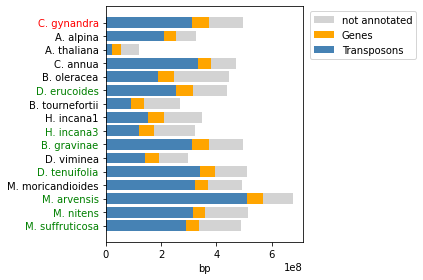

In [56]:
order = ['c_gynandra', 'a_alpina', 'a_thaliana', 'c_annua','b_oleracea', 'd_erucoides', 
         'b_tournefortii', 'h_incana1', 'h_incana3',  'b_gravinae',  'd_viminea', 'd_tenuifolia',
       'm_moricandioides', 'm_arvensis','m_nitens',  'm_suffruticosa']

left = [i+m for i, m in zip(frag_te_order.values(), intact_te_order.values())]

frag_te_order = {}
for i in order:
    frag_te_order[i] = frag_te[i] 
    
intact_te_order = {}
for i in order:
    intact_te_order[i] = intact_te[i] 

fig, ax = plt.subplots()
for i in range(len(list(order))):
    ax.barh(i, genome_sizes[order[i]], color = 'lightgray', label="not annotated" if i == 0 else "") #heres n error
    ax.barh(i, features[order[i]], left = left[i], color = 'orange', label="Genes" if i == 0 else "")
   
    

ax.barh(['. '.join(m.split('_')).capitalize() for m in order], [i+m for i, m in zip(frag_te_order.values(), intact_te_order.values())], color = 'steelblue', label = 'Transposons')
ax.set_xlabel('bp')

a = [['red']*1, ['k']*4, ['green']*1 , ['k']*2, ['green']*2, ['k'] ,['green'], ['k'], ['green']*3, ['k']]
col = (list(itertools.chain.from_iterable(a)))
[t.set_color(i) for (i,t) in zip(col ,ax.yaxis.get_ticklabels())]

ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.gca().invert_yaxis()

plt.tight_layout()